# U.S. Medical Insurance Costs

# 1. Look over your dataset

Download a zip file here with the necessary datasets and an empty Jupyter Notebook where you can write your code.

Open insurance.csv and take a look at the file. Take note of how information is organized. How will this affect how you analyze the data in Python? Is there anything of particular interest to you in the dataset that you want to investigate? Think about these things before you jump into analyzing it.


* The data in the csv file is organized as a table: information of each person is stored in a row with 7 attributes in the columns:

    age, sex, bmi, children, smoker, region, charges
    
* Some of the columns are categorical (sex, smoker, region) while other are numerical (age: int, bmi: float, children: int, charges: float), all numbers are positive.
    
* There is no missing data

A library reading .csv files will be useful for importing the data. It would make sense to store the data in a dictionary with keys named according to the columns (variables) and values containing the list of all observations for each variable.

It would be intersting to know how much each of the 6 features - age, sex, BMI, number of children, whether the person smokes and region of residence - affects the charges (how much does the person pay for the medical insurance). But it is out of scope for now, we could go back to this question after we covered visualization and prediction (linear regression).


# 2. Scoping Your Project

Now that you have looked over your dataset, plan out what you want to analyze. What is it that you want to find out about this dataset? Based on the way information is organized, certain inspections may be easier to perform than others. As you map out the process, consider the scope of your analysis as well.

Properly scoping your project will greatly benefit you; scoping creates structure while requiring you to think through your entire project before you begin. You should start by stating the goals for your project, then gathering the data, and considering the analytical steps required. A proper project scope can be a great road map for your project, but keep in mind that some down-stream tasks may become dead ends which will require adjustment to the scope. 

We want to analyze the population itself and answer the following questions:
* Are people more likely to be healthy (no smoking, normal BMI) at younger age or older, with children or without them, if they are male or female?

    * Children vs. smoker - Are people more likely to be smokers with children or not?
    * Sex vs. smoker - Are females more likely to be smokers than males?
    * Age vs. smoker - which part of the population smokes the most? At what age do they usually start?
    * BMI vs. age - How does BMI distribution looks like for different age groups? Does BMI increase with age?
    * BMI vs. sex - How does BMI distribution looks like for males and for females? Which sex is more predisposed to obesity?
    * BMI vs. smoker - Do smokers have a higher BMI than non-smokers?
    * BMI vs. children - Does BMI increase with the number of children?
    
Since BMI and age variables are numerical, we should subdivide them into a few categories to simplify the analysis (since we decided to investigate the data without plotting).

# 3. Import your dataset

Import insurance.csv into your Python file and inspect the contents.


In [1]:
%ls

LICENSE                           insurance.csv
README.md                         us-medical-insurance-costs.ipynb


In [2]:
import csv
dataset = {}
with open("insurance.csv", newline='') as insurance_csv:
    dict_reader = csv.DictReader(insurance_csv) # converts the lines of our CSV file to Python dictionaries
    column_names = dict_reader.fieldnames
    for column_name in column_names:
        dataset[column_name] = []
    for row in dict_reader:
        # row is an ordered dictionary entry containing a tuple with the column heading and the data for each observation
        # key is the column heading and the value is data at each observation
        for key, value in row.items():
            dataset[key].append(value)
# test
for key, value in dataset.items():
    print("{}: {}".format(key, len(value)))

age: 1338
sex: 1338
bmi: 1338
children: 1338
smoker: 1338
region: 1338
charges: 1338


In [3]:
#print(dataset)

### Using Pandas
Borrowed from rj-pal

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('insurance.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 4. Save your dataset via Python variables

Save the features of your dataset (the columns) from insurance.csv by storing them in variables that can be used for analysis. As you consider what types of variables to use and how many you plan to create, think ahead about the parameters you wish to investigate and how your organization will impact this analysis.


# 5. Build out analysis functions or class methods

You now have everything you need to begin your analysis. You have organized the information from insurance.csv and have spent some time thinking about what it is you would like to investigate.

Now is the time to build out how you perform these investigations. Use the Python fundamentals you have learned so far to accomplish these tasks. There are many different ways you can achieve these analyses. In our hint, we will provide some ideas for how you can use Python to analyze data.

In [8]:
def variable_count(data, variable_key): # data is dataset, variable_key is the column you want to count
    count_dict = {}
    for i in range(len(data[variable_key])):
        if data[variable_key][i] not in count_dict:
            count_dict[data[variable_key][i]] = 1
        else:
            count_dict[data[variable_key][i]] += 1
    return count_dict

In [9]:
def variable_percentage(data, variable_key):
    counts = variable_count(data, variable_key)
    total = sum(counts.values())
    percentage_dict = {}
    for key, value in counts.items():
        percentage_dict[key] = round(value / total * 100, 2)
    return percentage_dict

In [10]:
def get_tuple_list(data, key1, key2):
    return list(zip(data[key1], data[key2]))

# Investigating Region and BMI 
The purpose of this analysis is to examine the differences in regions and bmi

In [11]:
region_count = variable_count(dataset, 'region')
region_count

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}

In [12]:
region_percent = variable_percentage(dataset, 'region')
region_percent

{'southwest': 24.29, 'southeast': 27.2, 'northwest': 24.29, 'northeast': 24.22}

In [13]:
# Refactored with float values and borrowed from kalemaria
def values_by_feature(data, feature1, feature2):
    """Feature 1 must be numeric type"""
    feature1_by_feature2 = {}
    for feature1, feature2 in get_tuple_list(data, feature1, feature2):
        if feature2 not in feature1_by_feature2:
            feature1_by_feature2[feature2] = [float(feature1)]
        else:
            feature1_by_feature2[feature2].append(float(feature1))
    return feature1_by_feature2

In [14]:
region_bmi = values_by_feature(dataset, 'bmi', 'region')

In [15]:
import numpy as np
for key, values in region_bmi.items():
    print(f'Summary for the {key} region (count of {region_count[key]}):')
    print(f'The bmi ranges from {min(values)} to {max(values)}.')
    print(f'The average bmi is {round(np.array(values).mean(), 2)} and the median bmi is {round(np.median(np.array(values)), 2)}')
    print()

Summary for the southwest region (count of 325):
The bmi ranges from 17.4 to 47.6.
The average bmi is 30.6 and the median bmi is 30.3

Summary for the southeast region (count of 364):
The bmi ranges from 19.8 to 53.13.
The average bmi is 33.36 and the median bmi is 33.33

Summary for the northwest region (count of 325):
The bmi ranges from 17.385 to 42.94.
The average bmi is 29.2 and the median bmi is 28.88

Summary for the northeast region (count of 324):
The bmi ranges from 15.96 to 48.07.
The average bmi is 29.17 and the median bmi is 28.88



In [16]:
# Data here matches with the data above
region_df = data.groupby('region')['bmi'].describe().reset_index()
region_df

,region,count,mean,std,min,25%,50%,75%,max
0,northeast,324.0,29.173503,5.937513,15.960,24.86625,28.88,32.89375,48.07
1,northwest,325.0,29.199785,5.136765,17.385,25.74500,28.88,32.77500,42.94
2,southeast,364.0,33.355989,6.477648,19.800,28.57250,33.33,37.81250,53.13
3,southwest,325.0,30.596615,5.691836,17.400,26.90000,30.30,34.60000,47.60


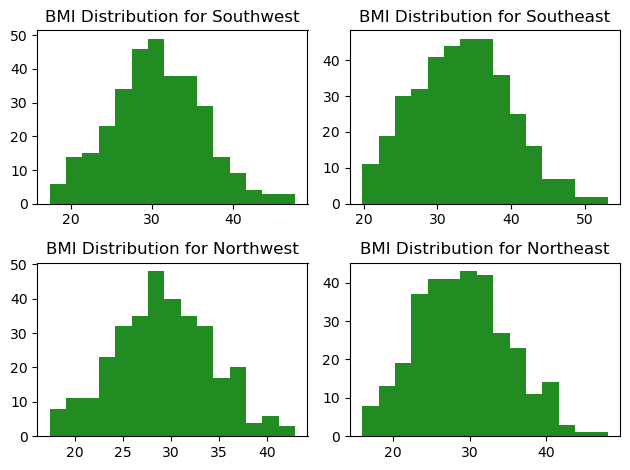

In [17]:
import matplotlib.pyplot as plt

for c, region in enumerate(region_count.keys()):
    mask = data['region'] == region
    plt.subplot(2, 2, c + 1)
    plt.hist(data=data[mask], x='bmi', bins=15, color='forestgreen')
    plt.title(f'BMI Distribution for {region.capitalize()}')
plt.tight_layout()
plt.show()

## Conclusions

- Regions in the the south have higer average BMIs than regions in the north, with the average for both the southest and southwest region belonging to the 'obese' category of health. It is noted that the other two regions were just under a bmi of 30, which is the borderline for being 'overweight' versus 'obese'
- The southeast region is the unhealthiest region with an average bmi of 33.36 and a range from 19.8 to 53.13. The histogram shows that a majority of the people in this region have a bmi over 30.
- Overall, the statistics for all regions were pretty similar indicating that a majority of Americans are unhealthy relatively speaking.

# Investigating smokers
## Smokers vs sex

The purpose of the investigation is to find out the percentage of female and male smokers in the population and whether females or males are more likely to be smokers.

In [18]:
#function for counting smokers vs other keys i.e. columns
#data is the tuple_list, we want to count occurences of the second item where the first tem is 'yes'
def smoker_count(data):
    smoker_dict = {}
    for item in data:
        if item[0] == 'yes':
            if item[1] not in smoker_dict:
                smoker_dict[item[1]] = 1
            else:
                smoker_dict[item[1]] += 1
    return smoker_dict

In [19]:
data = get_tuple_list(dataset, 'smoker', 'sex')

In [20]:
sex_smoker = smoker_count(data)
sex_smoker

{'female': 115, 'male': 159}

In [21]:
num_sex = variable_count(dataset, 'sex')
num_sex

{'female': 662, 'male': 676}

In [22]:
for key in num_sex.keys():
    percentage = sex_smoker[key] / num_sex[key] * 100
    print("{percentage}% of the {sex}s are smokers.".format(percentage = round(percentage,2), sex = key))

17.37% of the females are smokers.
23.52% of the males are smokers.


## Investigating percentage of smokers with children

The purpose of the comparison is to find out whether people with one or more children are more or less likely to be smokers.


In [23]:
data = get_tuple_list(dataset, 'smoker', 'children')
#data

In [24]:
num_children = variable_count(dataset, 'children')
num_children

{'0': 574, '1': 324, '3': 157, '2': 240, '5': 18, '4': 25}

In [25]:
num_smoker = variable_count(dataset, 'smoker')
num_smoker

{'yes': 274, 'no': 1064}

In [26]:
children_smoker = {}
children_smoker = smoker_count(data)#, 'children', children_smoker)
children_smoker

{'0': 115, '1': 61, '2': 55, '3': 39, '4': 3, '5': 1}

In [27]:
#percentage
for key in children_smoker.keys():
    percentage = children_smoker[key] / num_smoker['yes'] * 100
    print("{percentage}% of the smokers is with {children} children. ".format(percentage = round(percentage,2), children = key))

41.97% of the smokers is with 0 children. 
22.26% of the smokers is with 1 children. 
20.07% of the smokers is with 2 children. 
14.23% of the smokers is with 3 children. 
1.09% of the smokers is with 4 children. 
0.36% of the smokers is with 5 children. 


In [28]:
total_children_smoker = num_smoker['yes'] - children_smoker['0']
percent_total = total_children_smoker / num_smoker['yes'] * 100
print('{percentage} % of smokers have at least one child.'.format(percentage = round(percent_total,2)))

58.03 % of smokers have at least one child.


## Conclusions

There was no significant difference between the quantity of smokers among females (17%) and males (24%).

Surprisingly, smokers were more likely to have at least one child (58% of the smokers) which is a significant difference compared to the childless smokers (42% of the smokers). Parents should be educated about the effects on passive smoking on children's health and how important being a role model is. The more children a parent had, he/she was less likely to be a smoker, but also because there were only a few people with 4+ children (43 people out of 1338).


## BMI Analysis

### How many underweight, normal weight, overweight and obese people are in the dataset?

In [29]:
bmi_groups = { # key is the BMI group, value is the maximal value in the group
    "underweight": 18.5,
    "healthy weight": 25,
    "overweight": 30,
    "obese": float("inf")
}
def get_bmi_range(bmi):
    for key, value in bmi_groups.items():
        if bmi < value:
            return key
    return "obese"

In [30]:
data = pd.read_csv('insurance.csv')

In [31]:
# Add BMI range column to the dataset
data["bmi range"] = [get_bmi_range(bmi) for bmi in data["bmi"]]
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi range
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [32]:
bmi_range_count = variable_count(data, "bmi range")
bmi_range_count

{'overweight': 386, 'obese': 707, 'healthy weight': 225, 'underweight': 20}

In [33]:
# tesing variable_count using list method .count()
bmi_range_count = {}
bmi_ranges = data["bmi range"].values.tolist()
for bmi_group in bmi_groups.keys():
    bmi_range_count[bmi_group] = bmi_ranges.count(bmi_group)
bmi_range_count

{'underweight': 20, 'healthy weight': 225, 'overweight': 386, 'obese': 707}

In [34]:
# alternative using Counter from collections:
from collections import Counter
bmi_range_counts = Counter(bmi_ranges)
print(bmi_range_counts)

Counter({'obese': 707, 'overweight': 386, 'healthy weight': 225, 'underweight': 20})


In [35]:
bmi_range_percentage = variable_percentage(data, "bmi range")
for bmi_range, percentage in bmi_range_percentage.items():
    print (f"{round(percentage, 2)}% of the people are {bmi_range}")

28.85% of the people are overweight
52.84% of the people are obese
16.82% of the people are healthy weight
1.49% of the people are underweight


### BMI vs. age - What is BMI distribution for different age groups? Does it increase with age?

In [36]:
min(data.age)

18

In [37]:
max(data.age)

64

In [38]:
age_groups = [age for age in range(25, 66, 10)]
age_groups                                    

[25, 35, 45, 55, 65]

In [39]:
def values_by_age(data, age_groups, feature):
    age_group_to_values = {}
    # initialize the lists:
    for age_lim in age_groups:
        age_group_to_values["<" + str(age_lim)] = []
    # fill the lists:
    for age, value in get_tuple_list(data, "age", feature):
        for age_lim in age_groups:
            if age < age_lim:
                age_group_to_values["<" + str(age_lim)].append(value)
                break
    return age_group_to_values

In [40]:
def mean(l):
    return sum(l) / len(l)

In [41]:
# Find what BMI values fall into the 5 age groups:
age_group_to_bmi = values_by_age(data, age_groups, "bmi")
            
for age_group, bmi_list in age_group_to_bmi.items():
    print(f"For age group {age_group}, BMI ranges between {round(min(bmi_list), 2)} and {round(max(bmi_list), 2)}, mean BMI is {round(mean(bmi_list), 2)}")

For age group <25, BMI ranges between 15.96 and 53.13, mean BMI is 30.04
For age group <35, BMI ranges between 17.2 and 46.53, mean BMI is 30.06
For age group <45, BMI ranges between 16.82 and 47.6, mean BMI is 30.4
For age group <55, BMI ranges between 18.05 and 48.07, mean BMI is 31.15
For age group <65, BMI ranges between 18.34 and 49.06, mean BMI is 31.76


### BMI vs. sex - What is BMI distribution for males and for females? Which sex is more predisposed to obesity?

In [42]:
def values_by_feature(data, feature1, feature2):
    feature1_by_feature2 = {}
    for feature1, feature2 in get_tuple_list(data, feature1, feature2):
        if feature2 not in feature1_by_feature2:
            feature1_by_feature2[feature2] = [feature1]
        else:
            feature1_by_feature2[feature2].append(feature1)
    return feature1_by_feature2

In [43]:
# Subdivide the BMI by sex:
bmi_by_sex = values_by_feature(data, "bmi", "sex")
for sex, bmi_list in bmi_by_sex.items():
    print(f"For {sex}s, BMI ranges between {round(min(bmi_list), 2)} and {round(max(bmi_list), 2)}, mean BMI is {round(mean(bmi_list), 2)}")

For females, BMI ranges between 16.82 and 48.07, mean BMI is 30.38
For males, BMI ranges between 15.96 and 53.13, mean BMI is 30.94


In [44]:
# The same using pandas and groupby:
data.groupby('sex')['bmi'].agg(['min', 'max','median'])

,min,max,median
sex,,,
female,16.815,48.07,30.1075
male,15.960,53.13,30.6875


### BMI vs. smoker - Do smokers have a higher BMI than non-smokers?

In [45]:
# Subdivide the BMI by smoker:
bmi_by_smoker = values_by_feature(data, "bmi", "smoker")
for smoker, bmi_list in bmi_by_smoker.items():
    if smoker == "yes":
        print(f"For smokers, BMI ranges between {round(min(bmi_list), 2)} and {round(max(bmi_list), 2)}, mean BMI is {round(mean(bmi_list), 2)}")
    else: 
        print(f"For non-smokers, BMI ranges between {round(min(bmi_list), 2)} and {round(max(bmi_list), 2)}, mean BMI is {round(mean(bmi_list), 2)}")

For smokers, BMI ranges between 17.2 and 52.58, mean BMI is 30.71
For non-smokers, BMI ranges between 15.96 and 53.13, mean BMI is 30.65


In [46]:
# The same + median using pandas and groupby:
data.groupby('smoker')['bmi'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
smoker,,,,
no,15.960,53.13,30.651795,30.3525
yes,17.195,52.58,30.708449,30.4475


### BMI vs. children - Does BMI increase with the number of children?

In [47]:
# Subdivide the BMI by number of children:
bmi_by_children = values_by_feature(data, "bmi", "children")
for children, bmi_list in bmi_by_children.items():
    print(f"For {len(bmi_list)} people with {children} children, BMI ranges between {round(min(bmi_list), 2)} and {round(max(bmi_list), 2)}, mean BMI is {round(mean(bmi_list), 2)}")

For 574 people with 0 children, BMI ranges between 15.96 and 53.13, mean BMI is 30.55
For 324 people with 1 children, BMI ranges between 16.82 and 52.58, mean BMI is 30.62
For 157 people with 3 children, BMI ranges between 18.91 and 46.53, mean BMI is 30.68
For 240 people with 2 children, BMI ranges between 16.82 and 48.07, mean BMI is 30.98
For 18 people with 5 children, BMI ranges between 18.3 and 46.75, mean BMI is 29.61
For 25 people with 4 children, BMI ranges between 24.41 and 41.47, mean BMI is 31.39


In [48]:
# The same using pandas and groupby:
data.groupby('children')['bmi'].agg(['min', 'max','mean', 'median'])

,min,max,mean,median
children,,,,
0,15.960,53.13,30.550296,30.3025
1,16.815,52.58,30.623148,30.0150
2,16.815,48.07,30.978104,31.6400
3,18.905,46.53,30.684331,30.4950
4,24.415,41.47,31.391200,29.6400
5,18.300,46.75,29.605000,28.5500


In [49]:
# Subdivide the BMI by sex and number of children using pandas and groupby:
data.groupby(['sex', 'children'])['bmi'].agg(['min', 'max','mean', 'median'])

min    max       mean   median
sex    children                                   
female 0         17.290  47.41  30.361522  29.9250
       1         16.815  46.09  30.052658  29.5675
       2         17.195  48.07  30.649790  31.3000
       3         19.000  44.70  30.436429  30.2100
       4         25.600  41.47  31.943182  29.6400
       5         18.300  46.75  30.620625  30.2500
male   0         15.960  53.13  30.741719  30.5900
       1         17.385  52.58  31.166145  30.3500
       2         16.815  46.53  31.300992  31.7300
       3         18.905  46.53  30.922937  30.7900
       4         24.415  39.71  30.957500  30.2375
       5         23.900  42.40  28.792500  27.1500

### Conclusions
* According to this dataset, over a half of US adult popolation is obese, over a quarter are overweight, only ~17% are in a healthy weight range and ~1.5% are underweight, according to the commonly used BMI ranges (https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/, https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html).
* As expected, mean BMI increases with age, but not substantially. It is interesting that younger people (< 25 years) despite having the lowest mean BMI (30.04) tend to be more underweight (minimal BMI 15.96) or obese (maximal BMI 53.13), that is the spread is higher.
* Male population has a higher BMI spread than female population (15.96 - 53.13 vs. 16.82 - 48.07) with a slightly higher mean (30.94 vs. 30.38).
* Smokers do not have a substantially higher mean BMI than non-smokers (30.71 vs. 30.65).
* BMI seems to rise slightly with the number of children, except one outlier: people with 5 children have the lowest mean BMI (29.61), this group is also the smallest (18). However, when looking at women and men separately, this trend is lost.

# 6. Project Extensions

You’re welcome to expand your analysis beyond what you have already done! Some potential extra features to add to your portfolio project are the following:

* Organize your findings into dictionaries, lists, or another convenient datatype.
* Make predictions about what features are the most influential for an individual’s medical insurance charges based on your analysis.
* Explore areas where the data may include bias and how that would impact potential use cases.

Congrats on completing your portfolio project!


#### Creates a count of any column from the data set

In [50]:
def variable_count(data, variable_key): # data is dataset, variable_key is the column you want to count
    count_dict = {}
    for i in range(len(data[variable_key])):
        if dataset[variable_key][i] not in count_dict:
            count_dict[dataset[variable_key][i]] = 1
        else:
            count_dict[dataset[variable_key][i]] += 1
    return count_dict

In [51]:
smoker = variable_count(dataset, 'smoker')
smoker

{'yes': 274, 'no': 1064}

In [52]:
child = variable_count(dataset, 'children')
child

{'0': 574, '1': 324, '3': 157, '2': 240, '5': 18, '4': 25}

#### Zip the two lists into a tuple and use the information to count the number of people who smoke who have 0 to 5 children

In [53]:
# Make this a function like the one above if possible
data = list(zip(dataset['children'], dataset['smoker']))
child_smoker = {}
for row in data:
    if row[1] == 'yes':
        if row[0] not in child_smoker:
            child_smoker[row[0]] = 1
        else:
            child_smoker[row[0]] += 1
child_smoker

{'0': 115, '1': 61, '2': 55, '3': 39, '4': 3, '5': 1}

In [54]:
child[str(0)]

574

In [55]:
for i in range(6):
    percentage = (child_smoker[str(i)]/child[str(i)])
    print(f"Percentage of people with {i} children who smoke is: {percentage: 0.2%}")

Percentage of people with 0 children who smoke is:  20.03%
Percentage of people with 1 children who smoke is:  18.83%
Percentage of people with 2 children who smoke is:  22.92%
Percentage of people with 3 children who smoke is:  24.84%
Percentage of people with 4 children who smoke is:  12.00%
Percentage of people with 5 children who smoke is:  5.56%


#### Some Testing on making Classes - not sure if this is useful

In [56]:
class Person:
    def __init__(self, age, sex, bmi, children, smoker, region, charges):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.charges = charges
        
    def __repr__(self):
        return f"Age: {self.age}\nSex: {self.sex}\nBMI: {self.bmi}\nChildren: {self.children}\nSmoker: {self.smoker}\nRegion: {self.region}\nCharges: {self.charges}"


class Insurance:

    def __init__(self, csv_file):
        self._insurance_list = []
        
        self.properties = []
        self.age_list = []
        self.sex_list = []
        self.bmi_list = []
        self.children_list = []
        self.smoker_list = []
        self.region_list = []
        self.charges_list = []
    
                               
        self._create_insurance_object(csv_file)
        self.size = len(self._insurance_list)

    def _create_insurance_object(self, csv_file):
        try:
            with open("insurance.csv", newline='') as insurance_csv:
                dict_reader = csv.DictReader(insurance_csv)
                for name in dict_reader.fieldnames:
                    self.properties.append(name)

                for row in dict_reader:
                    insurance_person = Person(**row)
                    self.add_person(insurance_person)
        except FileNotFoundError:
            print("The path to the csv file does not exist. Your data is empty.")
    
    @property
    def size(self):
        return len(self._insurance_list)

    @size.setter
    def size(self, value):    
        self._size = value
        
    def add_person(self, Person):
        self._insurance_list.append(Person)
        self.age_list.append(Person.age)
        self.sex_list.append(Person.sex)
        self.bmi_list.append(Person.bmi)
        self.children_list.append(Person.children)
        self.smoker_list.append(Person.smoker)
        self.region_list.append(Person.region)
        self.charges_list.append(Person.charges)

    def get_list(self, name):
        if hasattr(self, f"{name}_list"):
            return getattr(self, f"{name}_list")
        else:
            raise ValueError(f"No such name exists: {name}")
    
    def count(self, name):
        count_dict = {}
        attr_list = self.get_list(name)
        for value in attr_list:
            if value not in count_dict:
                count_dict[value] = 1
            else:
                count_dict[value] += 1
        return count_dict
    
    def get_person(self, index):
        return self._insurance_list[index]
    
    def __repr__(self):
        display = 'Insurance Object with properties: '
        display_2 = "".join([f'{name} ' for name in self.properties])
        
        return display + display_2

In [57]:
# Test the Person Class
person_data = {
    "age": 30,
    "sex": "male",
    "bmi": 25.5,
    "children": 2,
    "smoker": False,
    "region": "north",
    "charges": 5000.0
}

person_insurance = Person(**person_data)
print(person_insurance)

Age: 30
Sex: male
BMI: 25.5
Children: 2
Smoker: False
Region: north
Charges: 5000.0


In [58]:
# Test the Insurance Class
insurance = Insurance('insurance.csv')

In [59]:
print(insurance)

Insurance Object with properties: age sex bmi children smoker region charges 


In [60]:
insurance.count('region')

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}

In [61]:
insurance.size

1338

In [62]:
insurance.get_person(156)

Age: 48
Sex: male
BMI: 24.42
Children: 0
Smoker: yes
Region: southeast
Charges: 21223.6758